### PROBLEM STATEMENT:
### Given the google rating data, use a hierarchical clustering algorithm to cluster reviews.


### import necessary libraries

In [2]:

%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#load and read csv 
df=pd.read_csv("google_review_ratings.csv")

In [4]:
df.head()
#print the first five records

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
#get the shape
df.shape

(5456, 26)

In [6]:
#datatypes of the variables
df.dtypes

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
Unnamed: 25    float64
dtype: object

In [7]:
#get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [8]:
#finding the null values
df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [9]:
#filling the null values
df.fillna(df.mean().round(1), inplace=True)


<ipython-input-9-bf396d0f695d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean().round(1), inplace=True)


In [10]:
#dropping columns
df.drop("Unnamed: 25",axis=1,inplace=True)

In [11]:
df.drop("User",axis=1,inplace=True)

In [12]:
#renaming the column names
df.rename(columns = {'Category 1':'ratings on churches',
                     'Category 2':'ratings on resorts',
                     'Category 3':'ratings on beaches',
                     'Category 4':'ratings on parks',
                     'Category 5':'ratings on threatres',
                     'Category 6':'ratings on museums',
                     'Category 7':'ratings on malls',
                     'Category 8':'ratings on zoo',
                     'Category 9':'ratings on restaurants',
                     'Category 10':'ratings on pubs/bars',
                     'Category 11':'ratings on local services',
                     'Category 12':'ratings on burger/pizza shops',
                     'Category 13':'ratings on hotels/other lodgings',
                     'Category 14':'ratings on juice bars',
                     'Category 15':'ratings on art galleries',
                     'Category 16':'ratings on dance clubs',
                     'Category 17':'ratings on swimming pools',
                     'Category 18':'ratings on gyms',
                     'Category 19':'ratings on bakeries',
                     'Category 20':'ratings on beauty & spas',
                     'Category 21':'ratings on cafes',
                     'Category 22':'ratings on viewpoints',
                     'Category 23':'ratings on monuments',
                     'Category 24':'ratings on gardens',
                      },inplace=True)


In [13]:
#displaying all the columns
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [15]:
#checking this column why it is showing dtypes as object
df["ratings on local services"].value_counts()
#because of value 2\t2.

5        1046
1.56       80
1.58       75
1.76       67
1.75       66
         ... 
3.84        1
2\t2.       1
3.82        1
3.18        1
3.54        1
Name: ratings on local services, Length: 296, dtype: int64

In [16]:
#finding the index of that value
df.loc[df["ratings on local services"]=="2\t2."]

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
2712,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,2.1,0.84,5.0,5.0,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57


In [17]:
#drop the 2712 th row
df.drop([df.index[2712]] ,axis=0,inplace=True)

In [18]:
#converting the objectcolumn to integer column
df["ratings on local services"]=df["ratings on local services"].apply(pd.to_numeric)

In [19]:
#print the first five columns
df.head()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5455 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ratings on churches               5455 non-null   float64
 1   ratings on resorts                5455 non-null   float64
 2   ratings on beaches                5455 non-null   float64
 3   ratings on parks                  5455 non-null   float64
 4   ratings on threatres              5455 non-null   float64
 5   ratings on museums                5455 non-null   float64
 6   ratings on malls                  5455 non-null   float64
 7   ratings on zoo                    5455 non-null   float64
 8   ratings on restaurants            5455 non-null   float64
 9   ratings on pubs/bars              5455 non-null   float64
 10  ratings on local services         5455 non-null   float64
 11  ratings on burger/pizza shops     5455 non-null   float64
 12  rating

In [21]:
#statstical summary
df.describe()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,1.455674,2.319824,2.489520,2.797192,2.959278,2.893809,3.351778,2.541047,3.126301,2.833093,2.550071,2.078339,2.125747,2.190346,2.206060,1.192821,0.949175,0.822374,0.969072,0.999443,0.965098,1.749941,1.530818,1.560577
std,0.827673,1.421542,1.247852,1.309084,1.338948,1.282301,1.413338,1.111338,1.356767,1.307509,1.381769,1.249208,1.406563,1.576372,1.715701,1.107105,0.973623,0.947993,1.202844,1.193097,0.928332,1.598275,1.316172,1.171677
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.685000,2.740000,4.095000,4.315000,3.840000,5.000000,3.190000,5.000000,3.530000,3.220000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### EDA

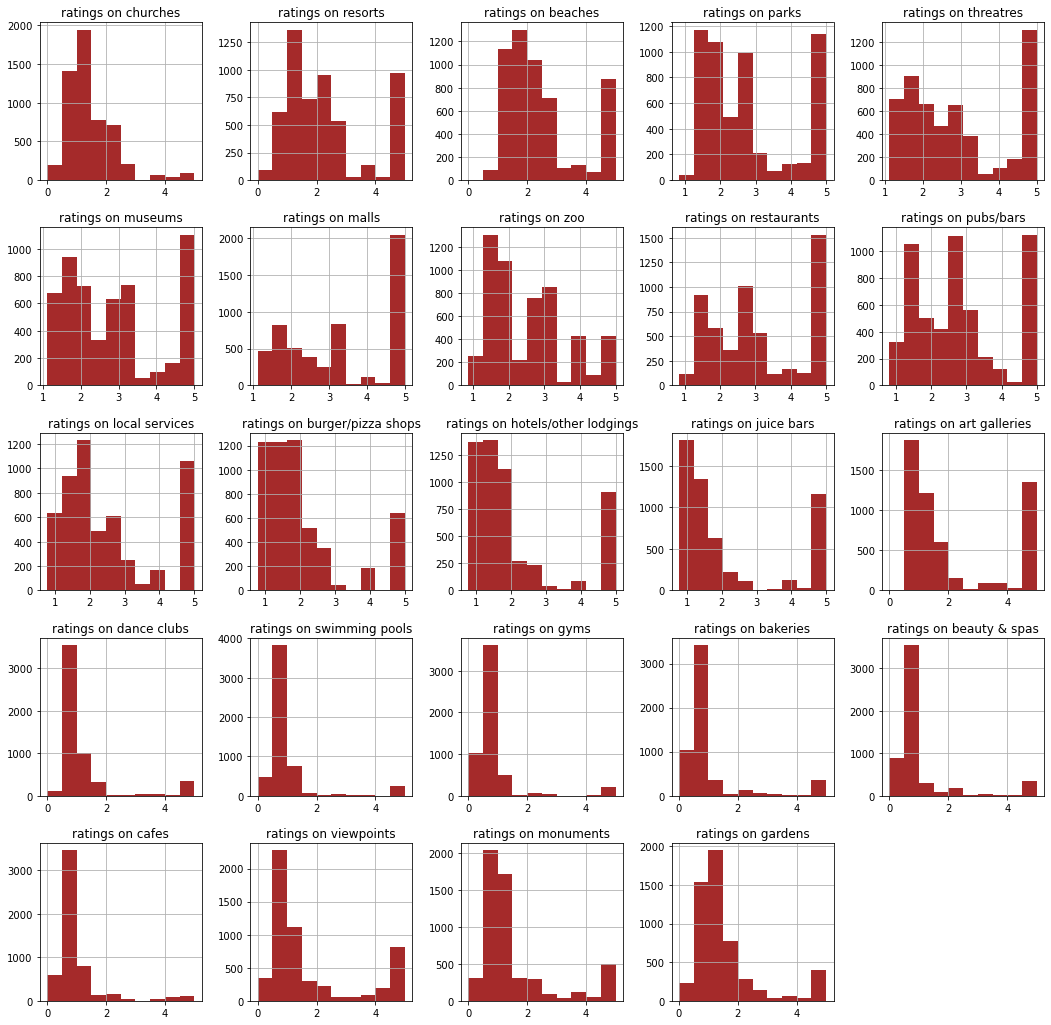

In [22]:
fig = df.hist(figsize = (18,18),color="brown")

In [23]:
column_names = df.columns.values

In [24]:
# Creating the dataframe containg number of review for each feature
reviews = df[column_names[1:]].astype(bool).sum(axis=0).sort_values()
reviews

ratings on bakeries                 4409
ratings on gyms                     4438
ratings on beauty & spas            4559
ratings on cafes                    4851
ratings on swimming pools           4976
ratings on viewpoints               5110
ratings on monuments                5153
ratings on gardens                  5230
ratings on dance clubs              5343
ratings on resorts                  5365
ratings on art galleries            5451
ratings on beaches                  5451
ratings on burger/pizza shops       5455
ratings on pubs/bars                5455
ratings on juice bars               5455
ratings on restaurants              5455
ratings on zoo                      5455
ratings on malls                    5455
ratings on museums                  5455
ratings on threatres                5455
ratings on parks                    5455
ratings on local services           5455
ratings on hotels/other lodgings    5455
dtype: int64

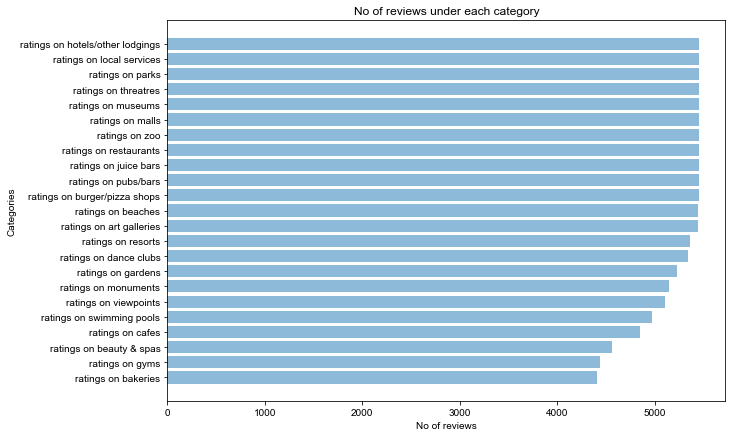

In [25]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), reviews.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])), reviews.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')
sns.set()

In [27]:
# Creating a dataframe to store number of reviews by users
no_of_reviews =df[column_names[1:]].astype(bool).sum(axis=1).value_counts()
no_of_reviews

23    3724
22     505
20     461
19     277
18     170
21     167
17     119
16      26
15       6
dtype: int64

Text(0.5, 1.0, 'No of Categories vs No of reviews')

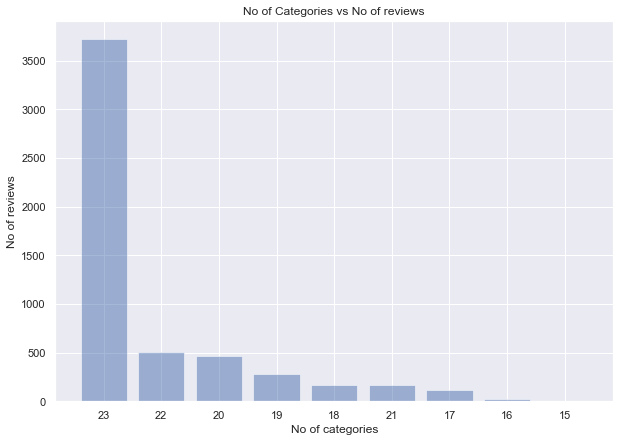

In [28]:
# Plotting the number of customers vs numbe of review
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

In [ ]:
#Conclusion--Around 3500 users have given a rating for all the 23 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommender system can be built

### Hierarchical clustering

In [30]:
#import relevant packages
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()
#normalize the data

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
0,0.0,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,0.156222,0.155303,0.156222,0.158060,0.159898,0.054218,0.045948,0.0,0.045948,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,0.155242,0.154329,0.155242,0.157068,0.158895,0.053878,0.045659,0.0,0.045659,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0
3,0.0,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,0.158840,0.155167,0.156085,0.157922,0.159758,0.054171,0.045907,0.0,0.045907,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.0,0.045697,0.0,0.0,0.0,0.0,0.0


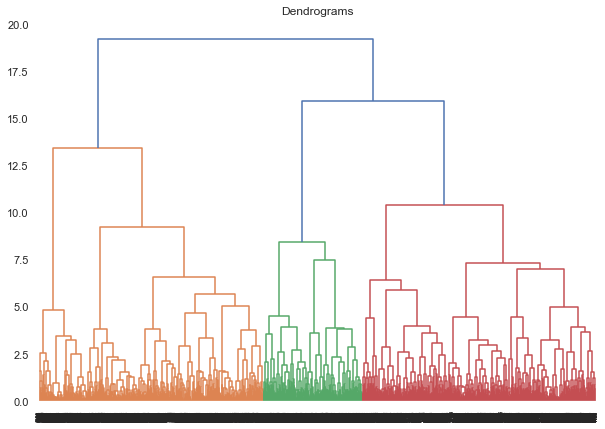

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
#The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

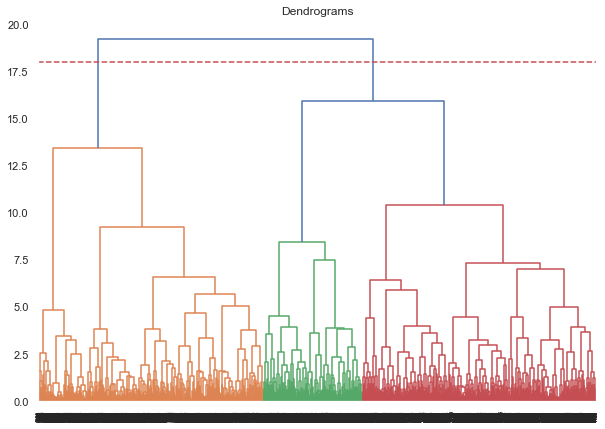

In [33]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=18, color='r', linestyle='--')

#### We can see that there are basically 2 clusters possible

In [35]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [36]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [39]:
data_final = df.copy(deep = True)
data_final.head()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [40]:
# Fitting the model
y_cluster = hc_model.fit_predict(data_final)

In [41]:
####Adding the cluster column


In [42]:
data_clustered = data_final.copy()

In [43]:
data_clustered["Cluster"] = y_cluster.astype('object')

In [44]:
data_clustered.head()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [45]:
##Visualizing the clusters

In [46]:
cols = list(data_final.columns)
#cols.remove("user_id")
cols

['ratings on churches',
 'ratings on resorts',
 'ratings on beaches',
 'ratings on parks',
 'ratings on threatres',
 'ratings on museums',
 'ratings on malls',
 'ratings on zoo',
 'ratings on restaurants',
 'ratings on pubs/bars',
 'ratings on local services',
 'ratings on burger/pizza shops',
 'ratings on hotels/other lodgings',
 'ratings on juice bars',
 'ratings on art galleries',
 'ratings on dance clubs',
 'ratings on swimming pools',
 'ratings on gyms',
 'ratings on bakeries',
 'ratings on beauty & spas',
 'ratings on cafes',
 'ratings on viewpoints',
 'ratings on monuments',
 'ratings on gardens']

## Conclusion

###### By using heirarchical clustering we clustered review into two category, positive review and a negative review

In [55]:
result = data_clustered.copy()

In [56]:
result.replace({'Cluster' : 1} , 'Positive' , inplace=True)
result.replace({'Cluster' : 0} , 'Negative' , inplace= True)

In [57]:
result.head()

,ratings on churches,ratings on resorts,ratings on beaches,ratings on parks,ratings on threatres,ratings on museums,ratings on malls,ratings on zoo,ratings on restaurants,ratings on pubs/bars,ratings on local services,ratings on burger/pizza shops,ratings on hotels/other lodgings,ratings on juice bars,ratings on art galleries,ratings on dance clubs,ratings on swimming pools,ratings on gyms,ratings on bakeries,ratings on beauty & spas,ratings on cafes,ratings on viewpoints,ratings on monuments,ratings on gardens,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Negative
